<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-24 01:47:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
169.63.118.104ourses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  70.5MB/s    in 2.9s    

2025-03-24 01:47:29 (70.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 142.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 136.2 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 129.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 102.6 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


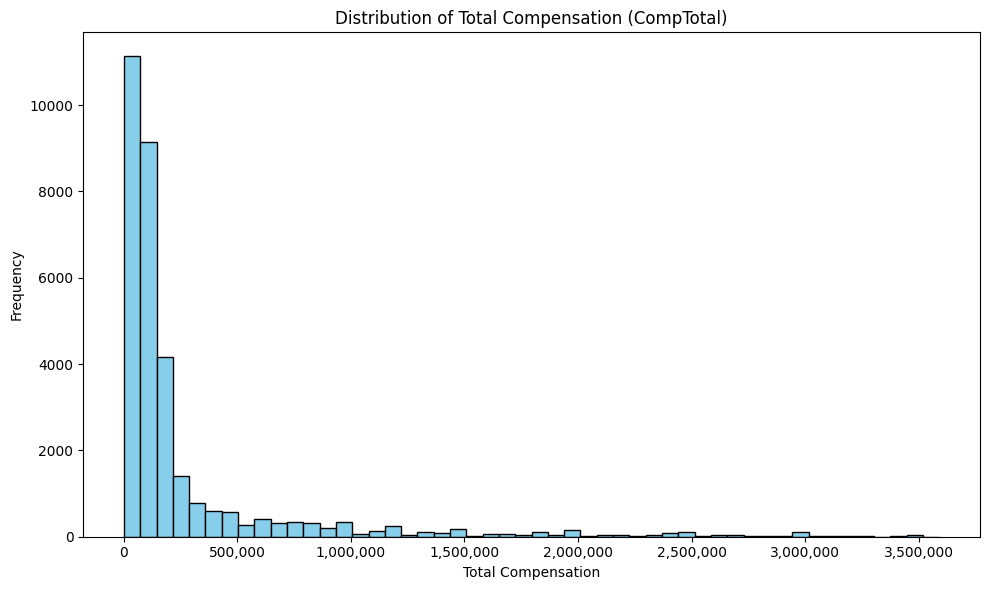

In [15]:
import matplotlib.ticker as ticker

# SQLクエリで CompTotal を取得
query = "SELECT CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# CompTotal を数値に変換（文字列や不正な値に対応）
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# 欠損値を除外し、極端な外れ値（上位5%）を除く
df_clean = df['CompTotal'].dropna()
df_filtered = df_clean[df_clean < df_clean.quantile(0.95)]

# ヒストグラムを描画
plt.figure(figsize=(10, 6))
plt.hist(df_filtered, bins=50, color='skyblue', edgecolor='black')

# x軸の指数表記を無効化
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title('Distribution of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


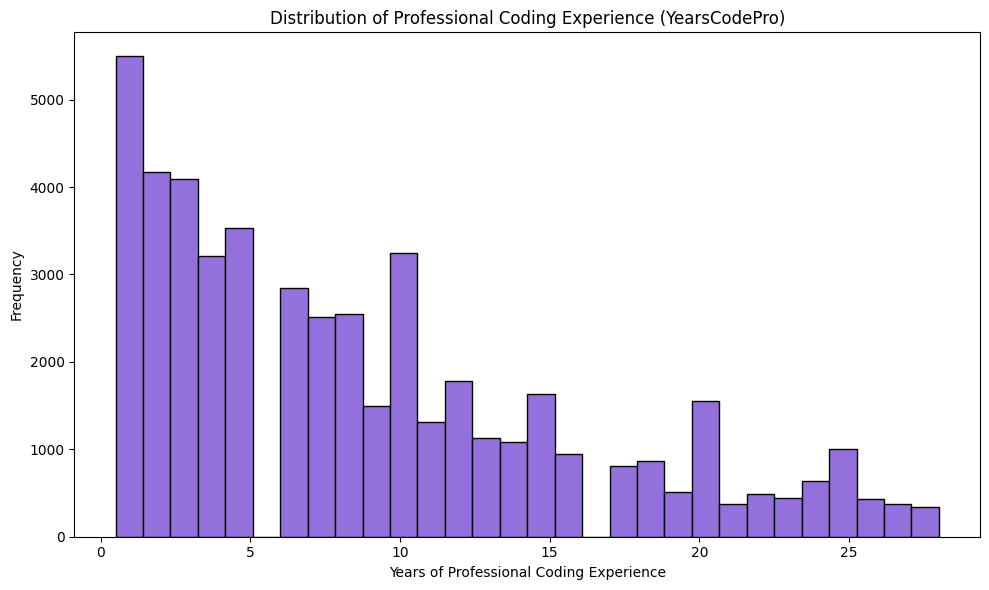

In [19]:
# SQLクエリで CompTotal を取得
query = "SELECT YearsCodePro FROM main"
df = pd.read_sql_query(query, conn)

# 年数を数値に変換（特殊文字列を処理）
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 欠損を除去し、上位5%の外れ値を除外（任意）
df_clean = df['YearsCodePro'].dropna()
df_filtered = df_clean[df_clean < df_clean.quantile(0.95)]

# ヒストグラムを描画
plt.figure(figsize=(10, 6))
plt.hist(df_filtered, bins=30, color='mediumpurple', edgecolor='black')

# x軸を通常表記に
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))

plt.title('Distribution of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


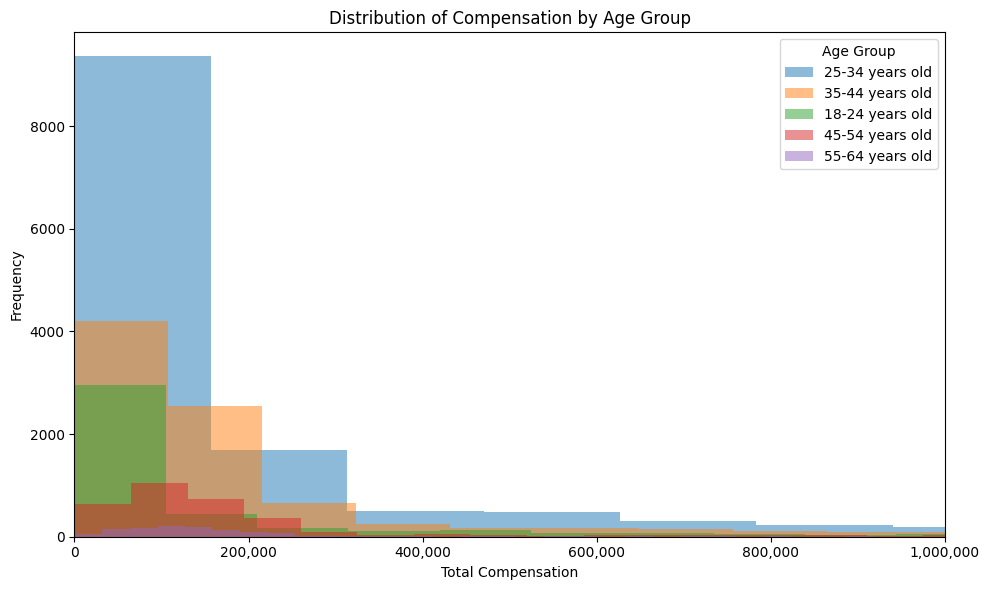

In [24]:
# Age & CompTotal を取得
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# CompTotal を数値に変換（不正値はNaNに）
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# 欠損を除去
df = df.dropna(subset=['Age', 'CompTotal'])

# 分布を比較する年齢層を選ぶ（上位から4〜5カテゴリが見やすい）
top_age_groups = df['Age'].value_counts().head(5).index.tolist()

# 描画準備
plt.figure(figsize=(10, 6))
plt.xlim(0, 1000000)  # ← x軸の表示を絞る（必要なら調整OK）
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 各年齢層の報酬分布をヒストグラムとして描画
for age_group in top_age_groups:
    group_data = df[df['Age'] == age_group]['CompTotal']
    # 外れ値を除去（上位5%カット）
    group_data = group_data[group_data < group_data.quantile(0.95)]
    plt.hist(group_data, bins=30, alpha=0.5, label=age_group)

# グラフの設定
plt.title('Distribution of Compensation by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


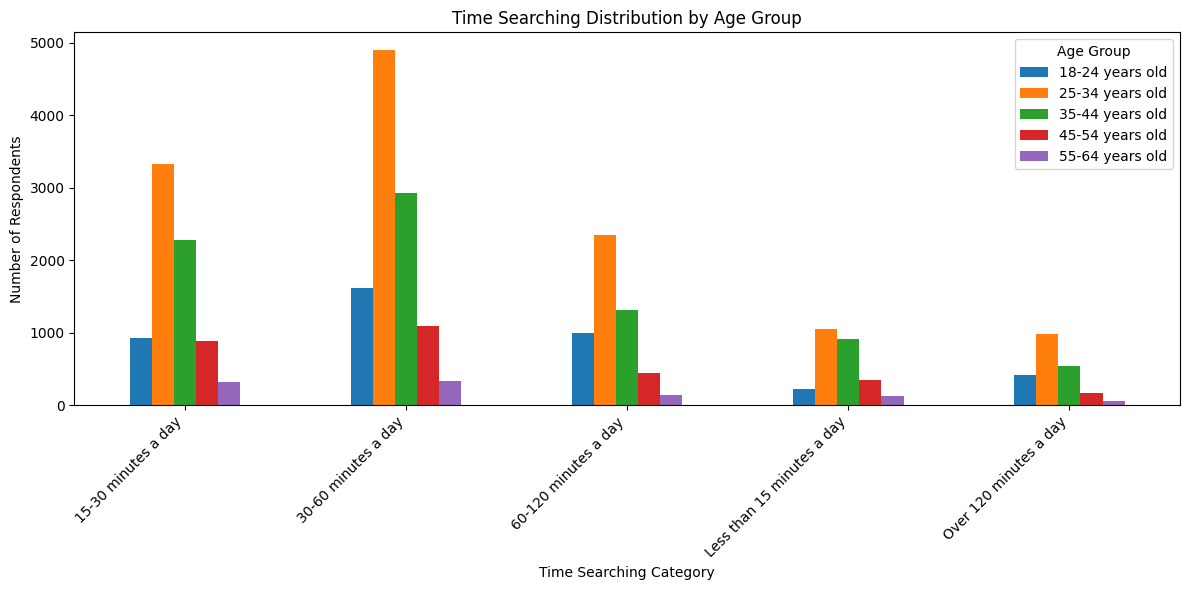

In [26]:
query = "SELECT Age, TimeSearching FROM main"
df = pd.read_sql_query(query, conn)

# 欠損除去
df = df.dropna(subset=['Age', 'TimeSearching'])

# 上位5つの年齢層に絞る
top_age_groups = df['Age'].value_counts().head(5).index.tolist()
df = df[df['Age'].isin(top_age_groups)]

# クロス集計（Age × TimeSearching）
ct = pd.crosstab(df['TimeSearching'], df['Age'])

# プロット（棒グラフ）
ct.plot(kind='bar', figsize=(12, 6))
plt.title('Time Searching Distribution by Age Group')
plt.xlabel('Time Searching Category')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


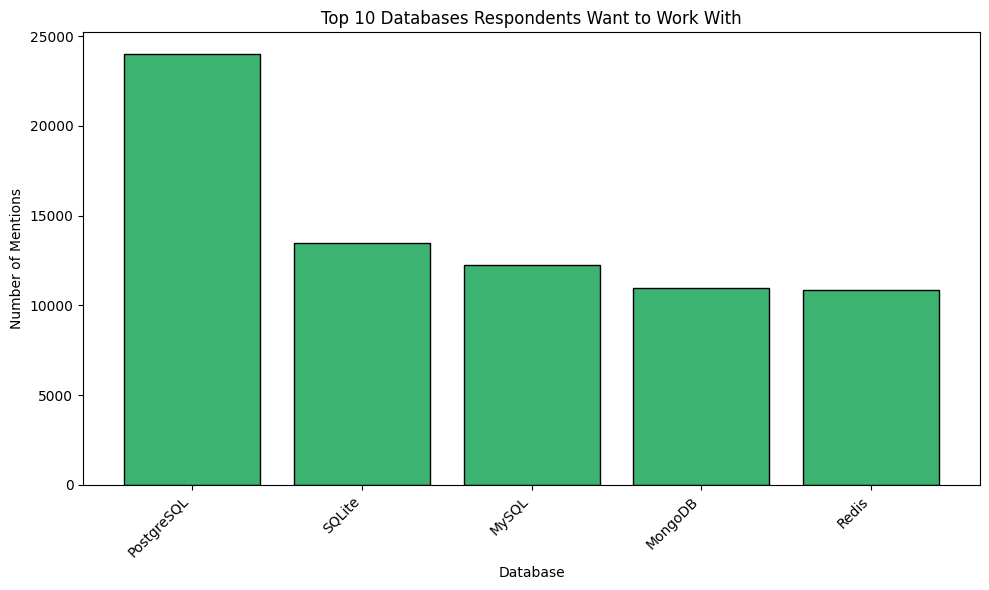

In [32]:
from collections import Counter

query = "SELECT DatabaseWantToWorkWith FROM main"
df = pd.read_sql_query(query, conn)

# 欠損除去 & セミコロンで分割
db_series = df['DatabaseWantToWorkWith'].dropna().str.split(';')
all_dbs = [db.strip() for sublist in db_series for db in sublist]

# 頻度カウント
db_counts = Counter(all_dbs)

# 上位5個を抽出（必要に応じて変更可能）
top_dbs = db_counts.most_common(5)
labels = [item[0] for item in top_dbs]
values = [item[1] for item in top_dbs]

# 棒グラフ描画
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color='mediumseagreen', edgecolor='black')
plt.title('Top 10 Databases Respondents Want to Work With')
plt.xlabel('Database')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


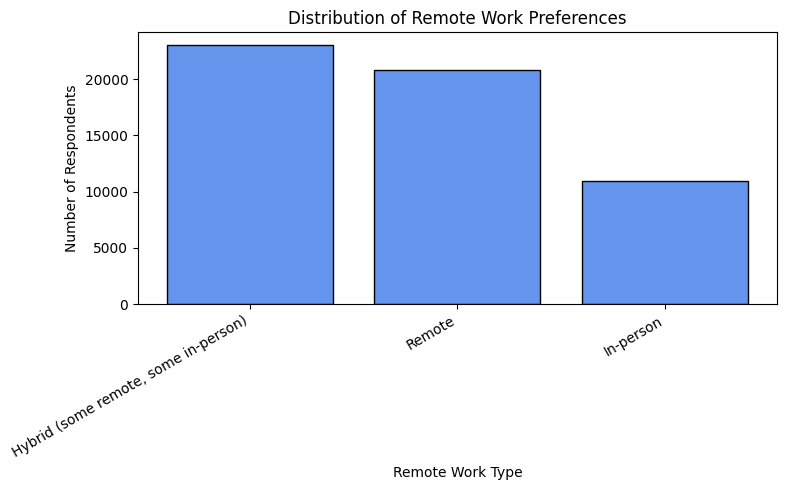

In [33]:
# SQLite データベースに接続して RemoteWork カラムを取得
query = "SELECT RemoteWork FROM main"
df = pd.read_sql_query(query, conn)

# 欠損を除去し、カテゴリの頻度をカウント
remote_counts = df['RemoteWork'].dropna().value_counts()

# 棒グラフを描画
plt.figure(figsize=(8, 5))
plt.bar(remote_counts.index, remote_counts.values, color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


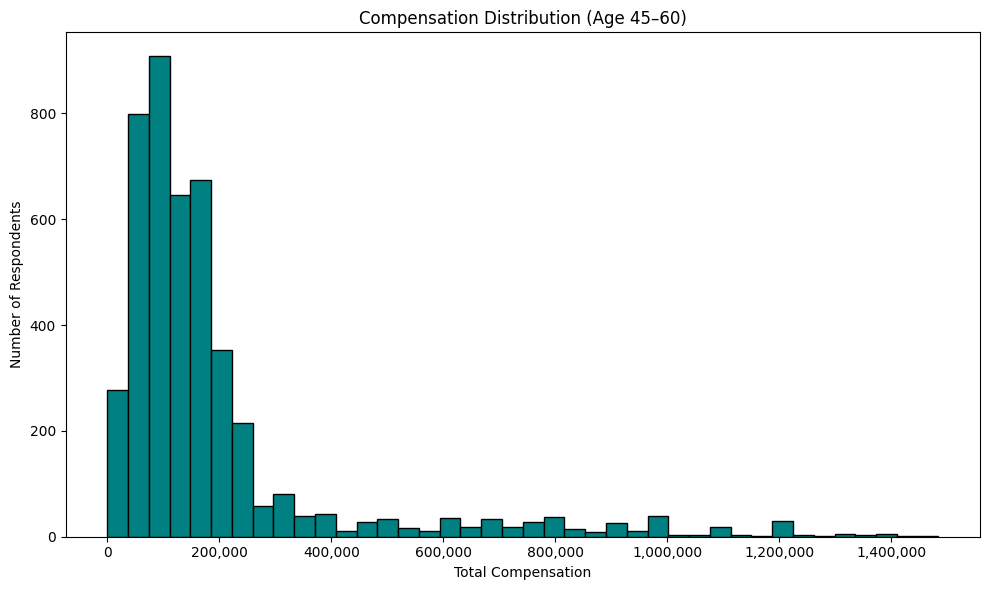

In [34]:
# SQLiteからデータ取得
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

# 対象の年齢層カテゴリ（45〜60歳に相当）
target_age_groups = ['45-54 years old', '55-64 years old']

# データ前処理
df = df[df['Age'].isin(target_age_groups)]
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

# 外れ値除去（上位5%をカット）
df_filtered = df[df['CompTotal'] < df['CompTotal'].quantile(0.95)]

# ヒストグラムを描画
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['CompTotal'], bins=40, color='teal', edgecolor='black')

# x軸を通常表記（指数をオフ）
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# タイトル・ラベル
plt.title('Compensation Distribution (Age 45–60)')
plt.xlabel('Total Compensation')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


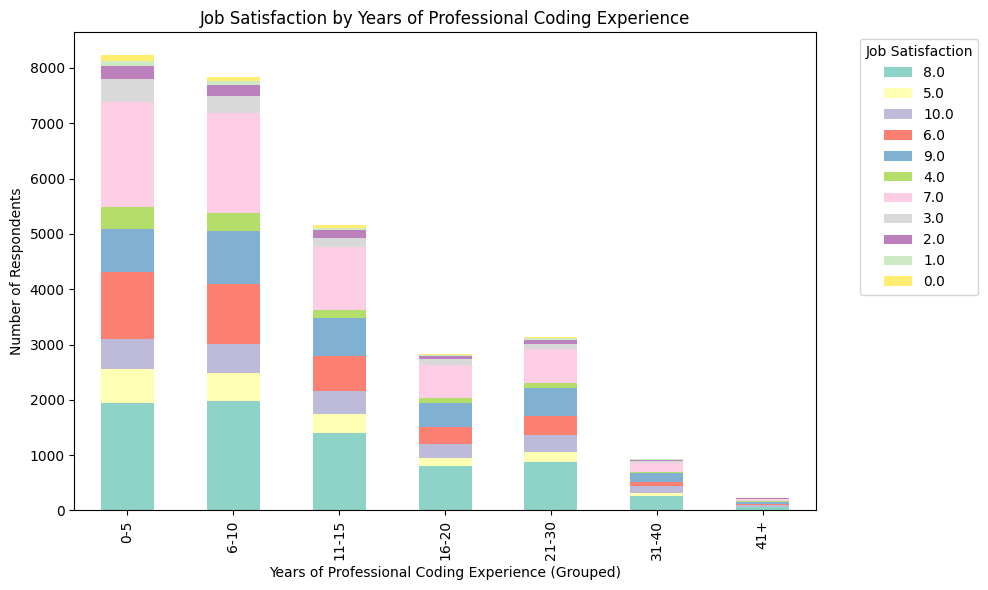

In [36]:
# SQLiteからデータ取得
query = "SELECT YearsCodePro, JobSat FROM main"
df = pd.read_sql_query(query, conn)

# YearsCodePro を数値に変換
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# 欠損除去
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# 経験年数を区間でビン分け
bins = [0, 5, 10, 15, 20, 30, 40, 60]
labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-40', '41+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# ← JobSatカテゴリをデータから自動取得（順不同だが網羅的）
job_sat_categories = df['JobSat'].dropna().unique().tolist()

# クロス集計（経験年数グループ × JobSat）
job_sat_counts = pd.crosstab(df['ExperienceRange'], df['JobSat'])[job_sat_categories]

# 積み上げ棒グラフを描画
job_sat_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience (Grouped)')
plt.ylabel('Number of Respondents')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [37]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
